# Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#Essential imports
#Pandas library helps to perform various functions on dataframe.
import pandas as pd
#Imported to handle dates and time.
import datetime
#Numpy Provides a fast numerical array structure and helper functions.
import numpy as np
#Will be used for Sampling the dataset.
#from sklearn.cross_validation import StratifiedShuffleSplit
#Libraries used for graphs and plots
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
#Imports to implement various Algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.feature_selection import RFECV
#from sklearn.cross_validation import StratifiedKFold
#from sklearn.cross_validation import train_test_split
#Classifier evaluation tools
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\VIK\Desktop\Kaggle Cab\Kaggle_YourCabs_training.csv")
df.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


# Data Pre-processing

In [3]:
# convert from_date column to date-time
# Note: when we try to convert NaN to date-time, it gets converted to NaT( Not a timestamp )
df['from_date']=pd.to_datetime(df['from_date'])
df['to_date']=pd.to_datetime(df['to_date'])
df['booking_created']=pd.to_datetime(df['booking_created'])
df.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


In [4]:
df.set_index(["id"], inplace=True)
df.Car_Cancellation.value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

In [5]:
df.head()

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
id,,,,,,,,,,,,,,,,,,,
132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


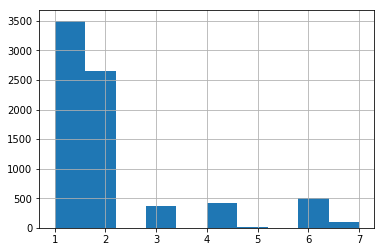

In [6]:
df.package_id.value_counts()
df.package_id.hist()

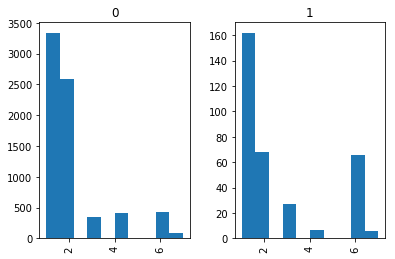

In [7]:
df.hist(column="package_id",by="Car_Cancellation");

In [8]:
#Realtion between area_id and Car_cancellation
d=pd.crosstab(df.from_area_id,df.Car_Cancellation) 
d.head()

Car_Cancellation,0,1
from_area_id,,
2.0,27,4
6.0,7,0
15.0,6,0
16.0,5,0
17.0,2,0


In [9]:
d['percent_cancelled'] = (d[1] / (d[1] + d[0])) * 100.

In [10]:
d.percent_cancelled.sort_values(ascending=False).iloc[:20]

from_area_id
138.0     100.000000
130.0      80.000000
1148.0     66.666667
1174.0     66.666667
630.0      66.666667
176.0      52.830189
1381.0     50.000000
1100.0     50.000000
1385.0     50.000000
1160.0     50.000000
1276.0     45.454545
211.0      44.444444
987.0      40.000000
1372.0     40.000000
356.0      40.000000
626.0      34.375000
177.0      33.333333
34.0       33.333333
1081.0     33.333333
980.0      33.333333
Name: percent_cancelled, dtype: float64

In [11]:
d.head()

Car_Cancellation,0,1,percent_cancelled
from_area_id,,,
2.0,27,4,12.903226
6.0,7,0,0.000000
15.0,6,0,0.000000
16.0,5,0,0.000000
17.0,2,0,0.000000


In [12]:
to = df.groupby(['to_area_id', 'Car_Cancellation']).size().unstack(1)

In [13]:
to.head()

Car_Cancellation,0,1
to_area_id,,
2.0,4.0,NaN
6.0,2.0,NaN
15.0,3.0,2.0
16.0,3.0,1.0
17.0,1.0,NaN


In [14]:
to['percent_cancelled'] = (to[1] / (to[1] + to[0])) * 100.

In [15]:
to.percent_cancelled.sort_values(ascending=False).iloc[:20]

to_area_id
1247.0    75.000000
677.0     66.666667
355.0     66.666667
1218.0    60.000000
845.0     60.000000
1310.0    50.000000
1311.0    50.000000
1387.0    50.000000
1197.0    50.000000
1225.0    50.000000
1193.0    50.000000
1235.0    50.000000
598.0     50.000000
1357.0    50.000000
1336.0    50.000000
118.0     50.000000
122.0     41.463415
626.0     40.000000
520.0     40.000000
525.0     40.000000
Name: percent_cancelled, dtype: float64

In [16]:
to.head()

Car_Cancellation,0,1,percent_cancelled
to_area_id,,,
2.0,4.0,NaN,NaN
6.0,2.0,NaN,NaN
15.0,3.0,2.0,40.0
16.0,3.0,1.0,25.0
17.0,1.0,NaN,NaN


In [17]:

from_to = df.groupby(['from_area_id', 'to_area_id', 'Car_Cancellation']).size()
f_t = from_to.unstack(2)
f_t.head()

Car_Cancellation            0    1
from_area_id to_area_id           
2.0          222.0        1.0  NaN
             393.0       12.0  NaN
             452.0        1.0  NaN
             455.0        NaN  1.0
             572.0        NaN  1.0

In [18]:
f_t['percent_cancelled'] = (f_t[1] / (f_t[0] + f_t[1])) * 100.
f_t.percent_cancelled.sort_values(ascending=False).iloc[:20]

from_area_id  to_area_id
626.0         122.0         90.909091
1349.0        1052.0        83.333333
1330.0        176.0         80.000000
1052.0        1349.0        78.571429
625.0         452.0         75.000000
1296.0        793.0         75.000000
1365.0        293.0         75.000000
1285.0        61.0          70.588235
122.0         626.0         70.000000
176.0         136.0         66.666667
1068.0        352.0         66.666667
264.0         585.0         66.666667
1384.0        160.0         66.666667
839.0         585.0         66.666667
571.0         396.0         66.666667
83.0          176.0         66.666667
1095.0        25.0          66.666667
363.0         1068.0        66.666667
542.0         1237.0        66.666667
541.0         83.0          66.666667
Name: percent_cancelled, dtype: float64

In [19]:
f_t.head()

Car_Cancellation            0    1  percent_cancelled
from_area_id to_area_id                              
2.0          222.0        1.0  NaN                NaN
             393.0       12.0  NaN                NaN
             452.0        1.0  NaN                NaN
             455.0        NaN  1.0                NaN
             572.0        NaN  1.0                NaN

In [20]:
from_to.head()

from_area_id  to_area_id  Car_Cancellation
2.0           222.0       0                    1
              393.0       0                   12
              452.0       0                    1
              455.0       1                    1
              572.0       1                    1
dtype: int64

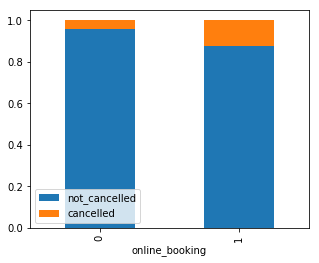

                not_cancelled  cancelled
online_booking                          
0                    0.956358   0.043642
1                    0.875377   0.124623


In [21]:
# how online or mobile booking affect on cancellation
#Analysing online_booking
ax=pd.crosstab(df.online_booking,df.Car_Cancellation,normalize='index')

ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)

In [22]:
booking_diff = df[['from_date', 'to_date', 'booking_created', 'Car_Cancellation']]
booking_diff.loc[:, 'difference'] = booking_diff.loc[:, ('from_date')] - booking_diff.loc[:, ('booking_created')]
booking_diff.head()

c:\users\vik\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\vik\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,from_date,to_date,booking_created,Car_Cancellation,difference
id,,,,,
132512,2013-01-01 02:00:00,NaT,2013-01-01 01:39:00,0,00:21:00
132513,2013-01-01 09:00:00,NaT,2013-01-01 02:25:00,0,06:35:00
132514,2013-01-01 03:30:00,NaT,2013-01-01 03:08:00,0,00:22:00
132515,2013-01-01 05:45:00,NaT,2013-01-01 04:39:00,0,01:06:00
132517,2013-01-01 09:00:00,NaT,2013-01-01 07:53:00,0,01:07:00


making new column time difference between booking date and travel date can help in analysis as booking made long time ago is  more likely to be cancelled .

In [23]:
a=np.array(df['from_date'])
a=a.astype('str')

b=[]
for j in a:
    b.append(j.split('T')[0])
print(b[:3])


['2013-01-01', '2013-01-01', '2013-01-01']


In [24]:
time=[]
for i in a:
    time.append(i.split('T')[1])
    
b_day=[]
b_month=[]
b_year=[]
for q in b:
    b_day.append(q.split('-')[2])
    b_month.append(q.split('-')[1])
    b_year.append(q.split('-')[0])
    
time_hours=[]
time_minutes=[]

for w in time:
    time_hours.append(w.split(':')[0])
    time_minutes.append(w.split(':')[1])
    
booking=np.array(df['booking_created'])
booking=booking.astype('str')
x=[]
for j in booking:
    x.append(j.split('T')[0])
booking_time=[]
for i in booking:
    booking_time.append(i.split('T')[1])
booking_day=[]
booking_month=[]
booking_year=[]
for q in x:
    booking_day.append(q.split('-')[2])
    booking_month.append(q.split('-')[1])
    booking_year.append(q.split('-')[0])
bookingtime_hours=[]
bookingtime_minutes=[]

for w in booking_time:
    bookingtime_hours.append(w.split(':')[0])
    bookingtime_minutes.append(w.split(':')[1])
    


In [25]:
import datetime
difference_days=[]
bookingdate=[]
tripdate=[]
for i in range(len(bookingtime_hours)):
    bookingdate.append(datetime.datetime(int(booking_year[i]),int(booking_month[i]),int(booking_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    tripdate.append(datetime.datetime(int(b_year[i]),int(b_month[i]),int(b_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    diff = tripdate[i] - bookingdate[i]
    days, seconds = diff.days, diff.seconds
    
    difference_days.append(days)
    
print(difference_days[10:20])

[0, 0, 0, 0, 0, 1, 1, 11, 0, 0]


In [26]:
booking_diff['diff_in_days']=difference_days
booking_diff.head(10)

c:\users\vik\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,from_date,to_date,booking_created,Car_Cancellation,difference,diff_in_days
id,,,,,,
132512,2013-01-01 02:00:00,NaT,2013-01-01 01:39:00,0,00:21:00,0
132513,2013-01-01 09:00:00,NaT,2013-01-01 02:25:00,0,06:35:00,0
132514,2013-01-01 03:30:00,NaT,2013-01-01 03:08:00,0,00:22:00,0
132515,2013-01-01 05:45:00,NaT,2013-01-01 04:39:00,0,01:06:00,0
132517,2013-01-01 09:00:00,NaT,2013-01-01 07:53:00,0,01:07:00,0
132518,2013-01-01 22:30:00,NaT,2013-01-01 08:01:00,0,14:29:00,0
132519,2013-01-01 09:45:00,1970-01-01 00:00:00.000041275,2013-01-01 09:21:00,0,00:24:00,0
132520,2013-01-01 11:00:00,NaT,2013-01-01 09:39:00,0,01:21:00,0
132521,2013-01-01 16:00:00,NaT,2013-01-01 09:44:00,0,06:16:00,0


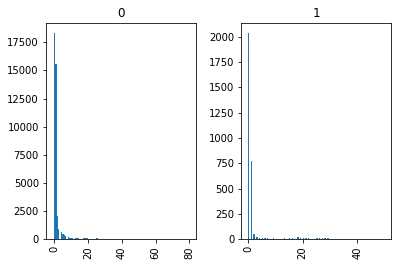

In [27]:
booking_diff.hist(column='diff_in_days', by='Car_Cancellation', bins=100);


In [28]:
booking_diff = df[['from_date', 'to_date', 'booking_created', 'Car_Cancellation']]
booking_diff.loc[:, ('difference')] = booking_diff.loc[:, ('from_date')] - booking_diff.loc[:, ('booking_created')]
booking_diff.head()

,from_date,to_date,booking_created,Car_Cancellation,difference
id,,,,,
132512,2013-01-01 02:00:00,NaT,2013-01-01 01:39:00,0,00:21:00
132513,2013-01-01 09:00:00,NaT,2013-01-01 02:25:00,0,06:35:00
132514,2013-01-01 03:30:00,NaT,2013-01-01 03:08:00,0,00:22:00
132515,2013-01-01 05:45:00,NaT,2013-01-01 04:39:00,0,01:06:00
132517,2013-01-01 09:00:00,NaT,2013-01-01 07:53:00,0,01:07:00


making new column time difference between booking date and travel date can help in analysis as booking made long time ago is  more likely to be cancelled .

In [29]:
a=np.array(df['from_date'])
a=a.astype('str')

b=[]
for j in a:
    b.append(j.split('T')[0])
print(b[:3])


['2013-01-01', '2013-01-01', '2013-01-01']


In [30]:
time=[]
for i in a:
    time.append(i.split('T')[1])


In [31]:
time_hours=[]
time_minutes=[]

for w in time:
    time_hours.append(w.split(':')[0])
    time_minutes.append(w.split(':')[1])

In [32]:
booking=np.array(df['booking_created'])
booking=booking.astype('str')
x=[]
for j in booking:
    x.append(j.split('T')[0])
booking_time=[]
for i in booking:
    booking_time.append(i.split('T')[1])
booking_day=[]
booking_month=[]
booking_year=[]
for q in x:
    booking_day.append(q.split('-')[2])
    booking_month.append(q.split('-')[1])
    booking_year.append(q.split('-')[0])
bookingtime_hours=[]
bookingtime_minutes=[]

for w in booking_time:
    bookingtime_hours.append(w.split(':')[0])
    bookingtime_minutes.append(w.split(':')[1])

In [33]:
import datetime
difference_days=[]
bookingdate=[]
tripdate=[]
for i in range(len(bookingtime_hours)):
    bookingdate.append(datetime.datetime(int(booking_year[i]),int(booking_month[i]),int(booking_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    tripdate.append(datetime.datetime(int(b_year[i]),int(b_month[i]),int(b_day[i]),int(bookingtime_hours[i]),int(bookingtime_minutes[i])))
    diff = tripdate[i] - bookingdate[i]
    days, seconds = diff.days, diff.seconds
    
    difference_days.append(days)
    
print(difference_days[10:20])

[0, 0, 0, 0, 0, 1, 1, 11, 0, 0]


In [34]:
b_day=[]
b_month=[]
b_year=[]
for q in b:
    b_day.append(q.split('-')[2])
    b_month.append(q.split('-')[1])
    b_year.append(q.split('-')[0])

In [35]:
booking_diff.loc[:,('diff_in_days')]=difference_days

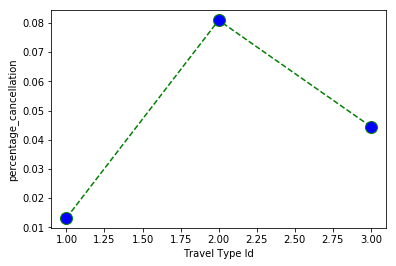

In [36]:
#Analysing travel type id
zc=pd.crosstab(df.travel_type_id,df.Car_Cancellation,normalize='index')
zc.columns=['not_cancelled','cancelled']
plt.plot(zc.index,zc['cancelled'],color='green', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=12)
plt.xlabel('Travel Type Id')
plt.ylabel('percentage_cancellation')
plt.show()

In [37]:
df.columns

Index(['user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'Cost_of_error'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 132512 to 185941
Data columns (total 19 columns):
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null datetime64[ns]
to_date                25541 non-null datetime64[ns]
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null datetime64[ns]
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-null float64
dtyp

In [39]:
df.loc[:, 'from_month'] = df.from_date.dt.month
df.loc[:, 'from_weekday'] = df.from_date.dt.weekday
df.loc[:, 'booking_month'] = df.booking_created.dt.month
df.loc[:, 'booking_weekday'] = df.booking_created.dt.weekday
df.loc[:, 'days_before_booking'] = booking_diff['diff_in_days']

In [40]:
feat_cols = ['vehicle_model_id', 'travel_type_id', 'from_area_id',
                 'to_area_id','from_month', 'from_weekday',
                 'days_before_booking', 'online_booking', 'mobile_site_booking',
                 'booking_month', 'booking_weekday']

In [41]:
features = df[feat_cols]
y = df.Car_Cancellation

features.head()

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_month,from_weekday,days_before_booking,online_booking,mobile_site_booking,booking_month,booking_weekday
id,,,,,,,,,,,
132512,28,2,83.0,448.0,1,1,0,0,0,1,1
132513,12,2,1010.0,540.0,1,1,0,0,0,1,1
132514,12,2,1301.0,1034.0,1,1,0,0,0,1,1
132515,12,2,768.0,398.0,1,1,0,0,0,1,1
132517,12,2,1365.0,849.0,1,1,0,0,0,1,1


In [42]:
#replce missing values with (-9999)
features.from_area_id.fillna(-9999, inplace=True)
features.to_area_id.fillna(-9999, inplace=True)

c:\users\vik\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [43]:
features.shape

(43431, 11)

In [44]:
y.head()

id
132512    0
132513    0
132514    0
132515    0
132517    0
Name: Car_Cancellation, dtype: int64

In [45]:
y.shape

(43431,)

In [46]:
features.from_area_id.fillna(-9999, inplace=True)
features.to_area_id.fillna(-9999, inplace=True)

In [47]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
z=0
for train_index, test_index in kf.split(features):
      print("Train:", train_index, "Validation:",test_index)
      Xtr, Xv = features.iloc[train_index], features.iloc[test_index] 
      ytr, yv = y.iloc[train_index], y.iloc[test_index]
      z+=1
print(z)

Train: [    0     1     3 ... 43427 43428 43430] Validation: [    2    15    21 ... 43425 43426 43429]
Train: [    0     1     2 ... 43427 43429 43430] Validation: [    4     6    10 ... 43414 43415 43428]
Train: [    1     2     3 ... 43428 43429 43430] Validation: [    0    17    28 ... 43416 43417 43419]
Train: [    0     2     3 ... 43428 43429 43430] Validation: [    1     5     7 ... 43418 43422 43427]
Train: [    0     1     2 ... 43427 43428 43429] Validation: [    3    11    12 ... 43421 43423 43430]
Train: [    0     1     2 ... 43428 43429 43430] Validation: [   17    18    20 ... 43412 43421 43423]
Train: [    0     1     2 ... 43428 43429 43430] Validation: [    3    13    21 ... 43419 43420 43422]
Train: [    0     1     2 ... 43427 43429 43430] Validation: [    5     9    16 ... 43418 43425 43428]
Train: [    1     2     3 ... 43426 43427 43428] Validation: [    0     6    14 ... 43417 43429 43430]
Train: [    0     3     5 ... 43428 43429 43430] Validation: [    1     2

# Implementing SVM

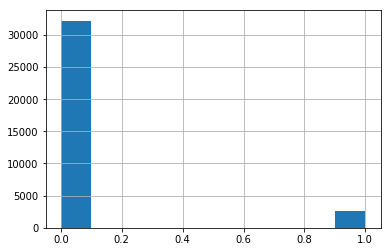

In [48]:
import matplotlib
import matplotlib.pyplot as plt
colors = ['red','green']
ytr.hist()


Car_Cancellation
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: user_id, dtype: object

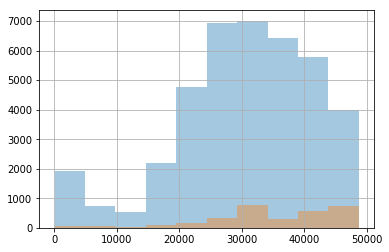

In [49]:
df.groupby('Car_Cancellation').user_id.hist(alpha=.4)

In [50]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svc=svclassifier.fit(Xtr, ytr)

c:\users\vik\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
y_pred = svclassifier.predict(Xtr)  

In [52]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytr,y_pred))  
print(classification_report(ytr,y_pred)) 

[[32197     0]
 [  945  1603]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     32197
           1       1.00      0.63      0.77      2548

   micro avg       0.97      0.97      0.97     34745
   macro avg       0.99      0.81      0.88     34745
weighted avg       0.97      0.97      0.97     34745



In [53]:
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(ytr, y_pred)
print("Accuracy of SVM is:",svm_accuracy)

Accuracy of SVM is: 0.9728018419916534


# Implementing KNN

In [58]:
#Create an array to store results of varios neighbors in KNN.
results = []
from sklearn.neighbors import KNeighborsClassifier

for n in range(1, 51, 2):
    
    knn = KNeighborsClassifier(weights='distance', n_neighbors=n)
    #Train the model on the training data set.
    knn.fit(Xtr, ytr)
    #Predict class labels using our trained model to evaluate the perfomance.
    p = knn.predict(Xv)
    accuracy = metrics.accuracy_score(yv,p)
    results.append([n, accuracy])

In [59]:
#Store the results into a dataframe
results = pd.DataFrame(results, columns=["n","accuracy"])
knn_accuracy = max(results.accuracy)

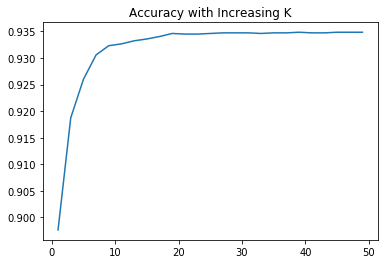

In [60]:
pl.plot(results.n,results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

we can see from the plot that is the number of neighbors increase the accuracy increases initially. 
However, after a certain number of neighbors is reached the accuracy starts dropping. 
This is due to model overfitting.

In [61]:
#Training KNN model for ideal value of Neighbors 'n'.
ideal_n = results.loc[results['accuracy'].idxmax()].n
print('Ideal value of neighbors would be', ideal_n)
ideal_n=int(ideal_n)
knn = KNeighborsClassifier(weights='distance', n_neighbors=ideal_n)
knn.fit(Xtr, ytr)
ytest_pred_knn = knn.predict_proba(Xv)[:, 1]
ytest_preds_threshold = [1 if pred > 0.10 else 0 for pred in ytest_pred_knn]
knn_auc_roc = roc_auc_score(yv, ytest_preds_threshold)

Ideal value of neighbors would be 39.0


In [62]:
print('Accuracy of KNN model', knn_accuracy)

Accuracy of KNN model 0.9348376698134929


Normalized confusion matrix
[[0.77 0.23]
 [0.46 0.54]]


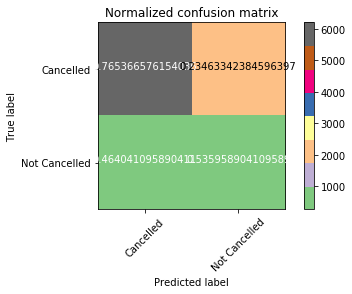

In [63]:
#Define a function to calculate and plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Accent):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yv, ytest_preds_threshold)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['Cancelled','Not Cancelled'],
#                      title='Confusion matrix, without normalization')



# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cancelled','Not Cancelled'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()